#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [3]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [4]:
# Task 1

row = len(df.axes[0])
col = len(df.axes[1])
print("Number of Row: " , row)
print("Number of Columns: " , col)

print("Data Types: ", df.dtypes)

print("Missing values: " , df.isnull().sum())


Number of Row:  148654
Number of Columns:  13
Data Types:  Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Missing values:  Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [6]:
# Task 2

print('Mean Salary:' , df['TotalPay'].mean())
print('Median Salary:' , df['TotalPay'].median())
print('Minimum Salary:' , df['TotalPay'].min())
print('Maximum Salary' , df['TotalPay'].max())
print('Range of Salaries:' , df['TotalPay'].min() , ' ' , df['TotalPay'].max())
print('Standard Deviation: ' , df['TotalPay'].std())

Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Minimum Salary: -618.13
Maximum Salary 567595.43
Range of Salaries: -618.13   567595.43
Standard Deviation:  50517.00527394987


In [7]:
# Task 3
df['EmployeeName'].fillna(df['EmployeeName'].mode()[0], inplace=True)
df['JobTitle'].fillna(df['JobTitle'].mode()[0], inplace=True)
df['Agency'].fillna(df['Agency'].mode()[0], inplace=True)
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)
df['TotalPay'].fillna(df['TotalPay'].mean(), inplace=True)
df['TotalPayBenefits'].fillna(df['TotalPayBenefits'].mean(), inplace=True)


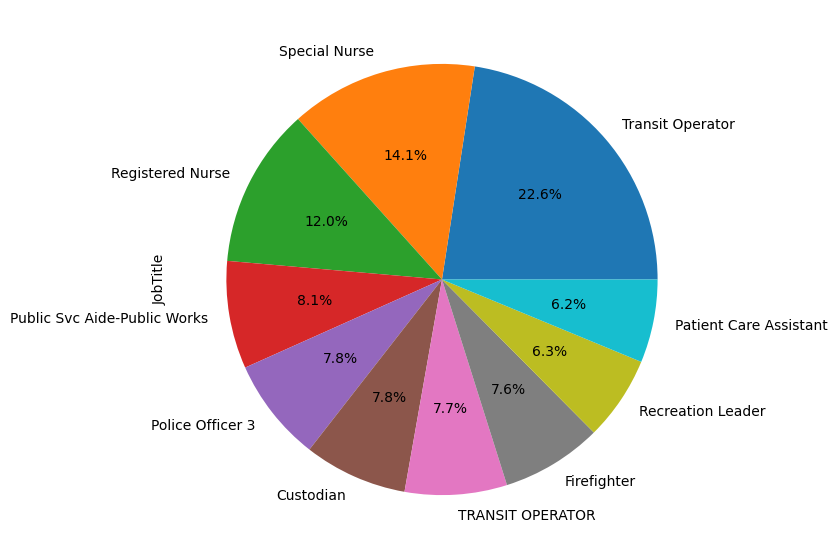

In [8]:
# Task 4
plt.figure(figsize=(12,7))
df['JobTitle'].value_counts().head(10).plot(kind='pie' , autopct='%1.1f%%')
plt.show()

In [9]:
# Task 5
group = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False)
print(group)

JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
                                                      ...      
Commissioner 16.700c, No Pay                          25.760000
IS Technician Assistant                                0.000000
Not provided                                           0.000000
Public Safety Comm Tech                                0.000000
Drug Court Coordinator                                 0.000000
Name: TotalPay, Length: 2159, dtype: float64


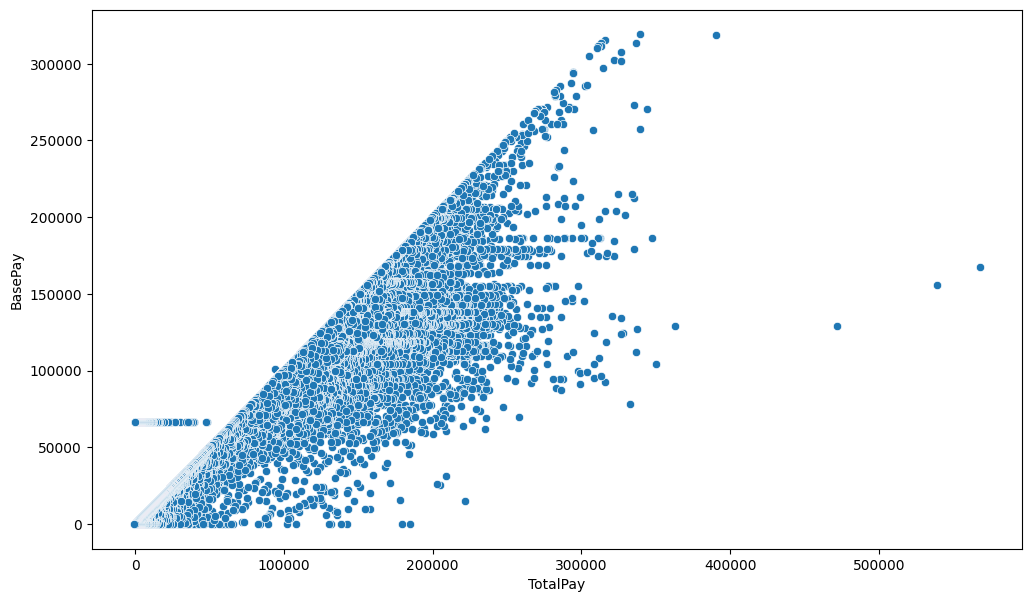

In [12]:
# Task 6
plt.figure(figsize=(12, 7))
seaborn.scatterplot(x=df['TotalPay'], y=df['BasePay'])
plt.show()

# Task 7
In the first request there are several ways to solve and I chose the solution using axes
In the second request, I used the ready-made mathematical functions found in Python, such as mean, median, max, min
In the third request, I used the value-location method to find the value from the column and used the fill method to fill in the empty values
In the fourth request, I used the matplotlib library to plot the 10 most significant values in the JobTitle and display them using show
In the fifth request, I grouped by JobTitle and by TotalPay and arranged them in ascending order
In the sixth order as shown in the output in the chart draw the relationship between BasePay, TotalPay.

# Good Luck!